This uses a simple neural network to classify a text into sarcastic or not

In [41]:
# Import required packages
import json
import numpy as np
import keras as keras
import matplotlib.pyplot as plt
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

Matplotlib is building the font cache; this may take a moment.


In [29]:
# Fix the json file (it creates the sarcasm_fixed.json file)

# with open('data/Sarcasm_Headlines_Dataset.json','r') as f:
#     lines = f.readlines()
#     s = '['
#     for line in lines:
#         #each line already had a '\n' so I had to strip it out, add a comma, and put the '\n' back in
#         s+= line[:-1] +',\n'
#     #the last line will have an extra ',\n' which we need to get rid of and cap with a ']'
#     s= s[:-2]+']'
# with open('./sarcasm_fixed.json', 'w') as f:
#     f.write(s)

In [30]:
with open('data/sarcasm_fixed.json', 'r') as f:
    datastore = json.load(f)

In [31]:
# Decode the json file

sentences =[]
labels = []
urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

Preprocessing 

In [32]:
# Split the dataset into training and test data

training_size = 20000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [33]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences)


In [34]:
# Converting the lists into numpy arrays
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

Training the neural network

In [39]:
###
# The top layer of the NN is an Embedding layer.
# It learns the direction of each work in the vector in epoch by epoch
# The GlobalAveragePooling adds up the vectors###

vocab_size = 30000
embedding_dim = 16
max_length = 100

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.GlobalMaxPool1D(),
    keras.layers.Dense(24, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# Training the model
epochs = 30

history = model.fit(training_padded, training_labels, epochs=epochs, validation_data=(testing_padded, testing_labels),
                    verbose=2)

Epoch 1/30
625/625 - 3s - 4ms/step - accuracy: 0.7143 - loss: 0.5474 - val_accuracy: 0.8028 - val_loss: 0.4357
Epoch 2/30
625/625 - 2s - 3ms/step - accuracy: 0.8638 - loss: 0.3342 - val_accuracy: 0.8264 - val_loss: 0.3763
Epoch 3/30
625/625 - 2s - 3ms/step - accuracy: 0.9238 - loss: 0.2047 - val_accuracy: 0.8335 - val_loss: 0.3870
Epoch 4/30
625/625 - 2s - 3ms/step - accuracy: 0.9599 - loss: 0.1218 - val_accuracy: 0.8305 - val_loss: 0.4188
Epoch 5/30
625/625 - 2s - 3ms/step - accuracy: 0.9787 - loss: 0.0703 - val_accuracy: 0.8317 - val_loss: 0.4681
Epoch 6/30
625/625 - 2s - 3ms/step - accuracy: 0.9892 - loss: 0.0398 - val_accuracy: 0.8293 - val_loss: 0.5154
Epoch 7/30
625/625 - 2s - 3ms/step - accuracy: 0.9950 - loss: 0.0221 - val_accuracy: 0.8253 - val_loss: 0.5735
Epoch 8/30
625/625 - 2s - 3ms/step - accuracy: 0.9983 - loss: 0.0122 - val_accuracy: 0.8256 - val_loss: 0.6301
Epoch 9/30
625/625 - 2s - 3ms/step - accuracy: 0.9990 - loss: 0.0068 - val_accuracy: 0.8213 - val_loss: 0.6837
E

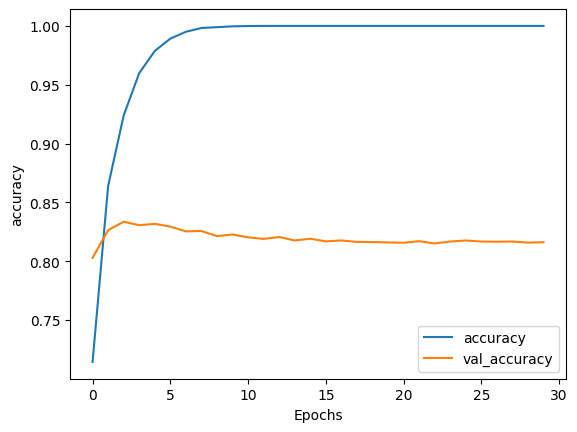

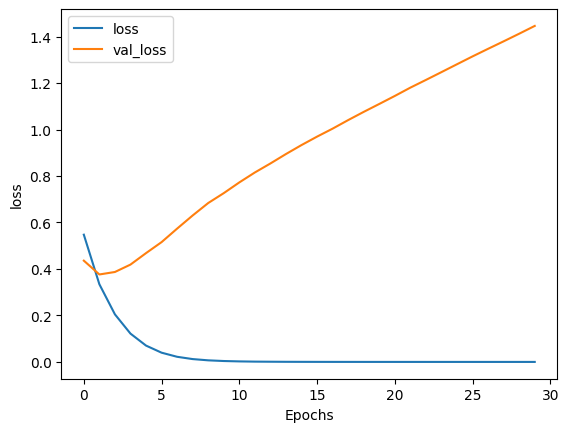

In [42]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [50]:
sentence = ["granny starting to fear spiders in the garden might be real", 
            "game of thrones season finale showing this sunday night",
            "your hair looks funny"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length)
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[2.3739016e-01]
 [3.7854004e-08]
 [9.9955219e-01]]
